In [259]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [260]:
titanic = pd.read_csv('titan train.csv').copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [262]:
titanic.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [263]:
titanic['Age'].loc[titanic['Age'].isnull()] = titanic['Age'].median()


/Users/jamiezeng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [264]:
titanic['Age'][titanic['Age'].isnull()]


Series([], Name: Age, dtype: float64)

In [265]:
titanic['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [266]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [267]:
titanic['Sex'][titanic['Sex']=='female'] =  0
titanic['Sex'][titanic['Sex']=='male'] =  1
titanic['Embarked'][titanic['Embarked'].isnull()] =  'S'
titanic['Embarked'][titanic['Embarked']=='S'] = 0
titanic['Embarked'][titanic['Embarked']=='Q'] = 1
titanic['Embarked'][titanic['Embarked']=='C'] = 2


/Users/jamiezeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jamiezeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jamiezeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doi

Text(0, 0.5, 'peoples')

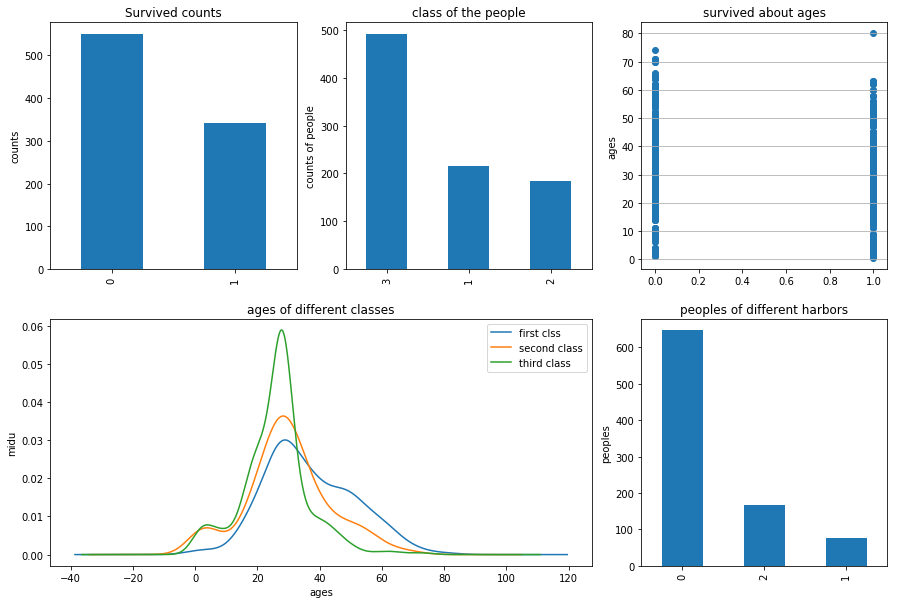

In [268]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
titanic['Survived'].value_counts().plot(kind='bar')
plt.title("Survived counts")
plt.ylabel('counts')

plt.subplot2grid((2,3),(0,1))
titanic['Pclass'].value_counts().plot(kind='bar')
plt.title('class of the people')
plt.ylabel('counts of people')

plt.subplot2grid((2,3),(0,2))
plt.scatter(titanic['Survived'], titanic['Age'])
plt.ylabel('ages')
plt.grid(b=True, which='major', axis='y')
plt.title('survived about ages')

plt.subplot2grid((2,3),(1,0),colspan=2)
titanic['Age'][titanic['Pclass'] == 1].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 2].plot(kind='kde')
titanic['Age'][titanic['Pclass'] == 3].plot(kind='kde')
plt.xlabel('ages')
plt.ylabel('midu')
plt.title('ages of different classes')
plt.legend(('first clss','second class','third class'),loc='best')

plt.subplot2grid((2,3),(1,2))
titanic['Embarked'].value_counts().plot(kind='bar')
plt.title('peoples of different harbors')
plt.ylabel('peoples')

In [269]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'

In [270]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = titanic['Pclass'][titanic['Survived'] == 0].value_counts()
Survived_1 = titanic['Pclass'][titanic['Survived'] == 1].value_counts()

<Figure size 432x288 with 0 Axes>

In [271]:
df=pd.DataFrame({u'Rescued':Survived_1, u'Unrescued':Survived_0})

In [272]:
df.head()

,Rescued,Unrescued
1,136,80
2,87,97
3,119,372


Text(0, 0.5, 'Number of people')

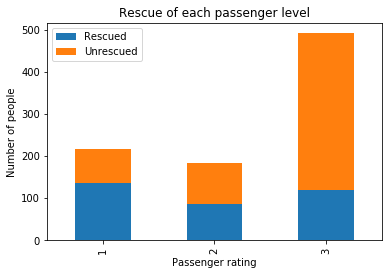

In [273]:
df.plot(kind='bar',stacked=True)
plt.title(u"Rescue of each passenger level")
plt.xlabel(u"Passenger rating") 
plt.ylabel(u"Number of people") 

In [274]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


In [275]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']

In [276]:
chi_selector = SelectKBest(chi2, k=8)

In [277]:
data = titanic[features].astype(np.float64)
target = titanic['Survived']


In [278]:
chi_selector.fit(data, target)
chi_support = chi_selector.get_support()
chi_feature = data.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

8 selected features


In [279]:
chi_selector.scores_


array([3.31293407e+00, 3.08736994e+01, 9.27024470e+01, 2.16491630e+01,
       2.58186538e+00, 1.00974991e+01, 4.51831909e+03, 3.38190224e+01])

In [280]:
features = np.array(features)


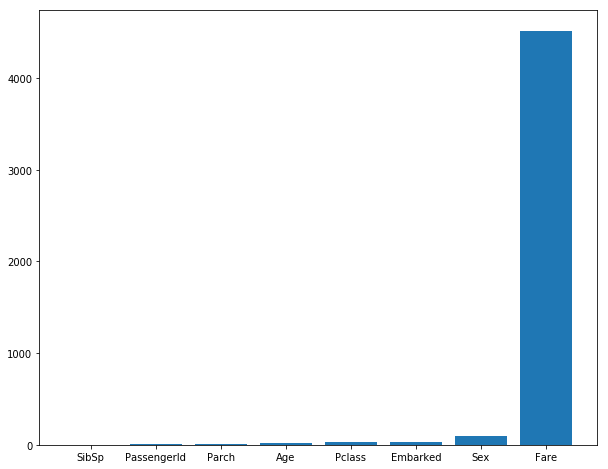

In [281]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(0,8),np.sort(sk.scores_))
_ = plt.xticks(np.arange(0,8),features[np.argsort(sk.scores_)])

In [282]:
data = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [284]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [285]:
rfc = RandomForestClassifier(n_estimators=100,min_samples_leaf=2,min_samples_split=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [286]:
pre = rfc.predict(X_test)

In [287]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       175
           1       0.85      0.70      0.77       120

   micro avg       0.83      0.83      0.83       295
   macro avg       0.83      0.81      0.81       295
weighted avg       0.83      0.83      0.82       295



In [288]:
print(confusion_matrix(y_test, pre))

[[160  15]
 [ 36  84]]


In [289]:
print(accuracy_score(y_test, pre))

0.8271186440677966
